# <center> Project 02: Application of classification in Marketing and Sales </center>

# Seminar goals:
In this project, we will develop and apply different supervised classification tecnhiques. These methodologies are broadly used in business to multiple use cases as:
- identify **new customers** in the market
- identify customers in our internal Data Warehouse with **more likely** to buy a new product
- identify unsatisfied customers and thus, likely to be **churners**
- classify text into categories for spam identification or to process messages or emails from our customers

During this project we will follow the end-to-end Machine Learning process: from data gathering and cleaning, exploratory data analysis, feature engineering and finally, training and prediction. In particular, the main sections of this project are:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management) 
2. Model Training: training the baseline SVM, Decision Trees and Naive Bayes models. Analysis of metrics (recall, precision, confusion metrics) and improvement the classification through several techniques as undersampling to balance or ensemble of models
3. Creating a Business opportunity with Machine Learning: selection of the best model and identification of the most important features



We will apply all these techniques to identify new customers to capture and improve sales in a **marketing use case**.

### Due date: up to xxx, 23:55h. 
### Submission procedure: via Moodle.

*******

# 0. Context:  Using Machine Learning to increase our customers base

We work as a head of data science and AI in a new Internet of Things (IoT) company. Our company designs, builds and implements wireless IoT products.

Our marketing colleagues are planning to launch a new commercial campaign for capturing new customers. We have to decide which companies are the target to be visited by our sales managers. As the cost to send a sales manager to visit a potential customer is quite high, we have to select from the total market base, those companies that are more likely to buy any of our products and become a new customer. 

To support this new campaign, we are **using several of the most important classification techniques**. We will manage key evaluation aspects of a classification as **recall, precision, false positive, etc...** to decide which are the best potential customers. 


## 0.1 Dataset

In this practice we are using a new dataset named `market_dt.csv`. This file contains information of **IoT market**, i.e. companies that could be interested to buy IoT products or they have already. In particular, the detailed information for each customer is:
- *City*: Name of the city where the company is located
- *Customer_Flag*: It is a flag that is 1 for current customers and 0 for non-customers
- *Revenue*: The annual incomes of the company
- *Sector*: It's an integer that identifies the sector of the company's activity
- *CNT_EMPLOYEE*: Number of employees of the company
- *CNT_CB_DENSITY*: Number of companies close
- *CNT_CB_MOB_DENSITY*: Number of companies with mobile services
- *CNT_CB_FN_DENSITY*: Number of companies with fixed services
- *Legal_Form_Code*: It's an integer that identifies the legal type of the company: big, small or medium company
- *Mobile potential*: It's an estimation of the total annual expense that a company can do in telco services, including IoT

## 0.2. Imports

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import iqr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, classification_report, confusion_matrix, precision_score, recall_score, precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# 1. Data understanding and preparation

The first stage in any Machine Learning project is to have a clear understanding of the dataset from a statistical point of view but also from the perspective of the value of their variables to solve the use case or problem. To achieve this goal we need to "clean" and "transform" the data. All this process is known as **Data Wrangling**. In particular, the whole data wrangling process implies:
- Define and apply an strategy for nulls and coding for categorical variables
- Analyze the variables distribution and correlation between them
- Remove outliers
- etc....


Let's open the csv with separator ";" and assign to a dataframe variable (use read_csv from Pandas library). Let's see the top 5 elements.

In [260]:
# load dataset
market_dt = pd.read_csv('market_dt.csv', usecols={'City', 'Customer_Flag', 'Revenue', 'Sector', 'CNT_EMPLOYEE',
                                                 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY',
                                                 'Legal_Form_Code','Mobile_potential'}, sep=";")
market_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
0,Bremen,0,21339309.0,26.0,14.0,25,161.0,154.0,10.0,1783.999887
1,Steinfurt,0,NaN,74.0,4.0,50,41.0,41.0,1.0,1884.468150
2,Magdeburg,0,NaN,83.0,28.0,28,188.0,187.0,6.0,1938.651093
3,Leipzig,0,NaN,61.0,28.0,12,597.0,594.0,21.0,1602.187431
4,Tamm,0,NaN,74.0,4.0,37,336.0,334.0,10.0,1931.884908


[**EX1**] [**REPORT**] Let's identify the type of the variables (integer, float, chart...) and the size of the dataset and the file. Which are the variable with more nulls? And with no nulls? Why 'City' variables is considered as object type?

Tip: [.info()](https://www.geeksforgeeks.org/python-pandas-dataframe-info/) is a function that reports the main characteristics of a dataframe.

In [261]:
# get information of dataset (size, type of variables, nulls,...)
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                13335 non-null  object 
 1   Customer_Flag       13335 non-null  int64  
 2   Revenue             8589 non-null   float64
 3   Sector              13235 non-null  float64
 4   Legal_Form_Code     13229 non-null  float64
 5   CNT_EMPLOYEE        13335 non-null  int64  
 6   CNT_CB_DENSITY      10265 non-null  float64
 7   CNT_CB_MOB_DENSITY  10265 non-null  float64
 8   CNT_CB_FN_DENSITY   10265 non-null  float64
 9   Mobile_potential    13335 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 1.0+ MB


Once we have the first contact with the dataset, next step is to decide the strategy to apply to **nulls** values. There are several options as removing the rows with any **null**, assigning a constant value (e.g. median or mean value), etc.... In our case, we are removing the rows with **null** in any of the values.

[**EX2**] [**CODE**] Eliminate those rows which has nulls in any variable. Let's check that there is no nulls in any variable. Which is the size of the resulting dataset? 

In [262]:
# remove nulls in features
market_dt = market_dt.dropna()

Your output should look like this:

In [263]:
# get information of dataset (size, type of variables, nulls,...)
market_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6987 entries, 0 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                6987 non-null   object 
 1   Customer_Flag       6987 non-null   int64  
 2   Revenue             6987 non-null   float64
 3   Sector              6987 non-null   float64
 4   Legal_Form_Code     6987 non-null   float64
 5   CNT_EMPLOYEE        6987 non-null   int64  
 6   CNT_CB_DENSITY      6987 non-null   float64
 7   CNT_CB_MOB_DENSITY  6987 non-null   float64
 8   CNT_CB_FN_DENSITY   6987 non-null   float64
 9   Mobile_potential    6987 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 600.4+ KB


In Machine Learning, it is key to analyze the variables from a statistical point of view: knowing the distribution of each variable, their mean and median are key to identify any transformation to apply before training the model. 
Furthermore, due to we are training a classifier (in our case, to classify between ***customers*** and ***non customers***), this analysis should be done for both classes separetly.

[**EX3**] [**REPORT**] Create a `customer_dt`and `noncustomer_dt`datasets based on the `Customer_Flag`variable (`Customer_Flag`=1 for **customers** and 0 for **noncustomers**). Build a boxplot for the `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential` and `CNT_CB_Density` numeric variables for both datasets. Which are the main differences between `customer_dt`and `noncustomer_dt` datasets comparing these variables. Which is the dataset with `CNT_EMPLOYEE` higher? Which datasets have more outliers in `Revenues`? Which is the Q1, median (=Q2) and Q3 for `Revenues`and `Mobile_potential`?


Tip: you may have to use the [boxplot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html) function.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1111 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                1111 non-null   object 
 1   Customer_Flag       1111 non-null   int64  
 2   Revenue             1111 non-null   float64
 3   Sector              1111 non-null   float64
 4   Legal_Form_Code     1111 non-null   float64
 5   CNT_EMPLOYEE        1111 non-null   int64  
 6   CNT_CB_DENSITY      1111 non-null   float64
 7   CNT_CB_MOB_DENSITY  1111 non-null   float64
 8   CNT_CB_FN_DENSITY   1111 non-null   float64
 9   Mobile_potential    1111 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 95.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5876 entries, 0 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                5876 n

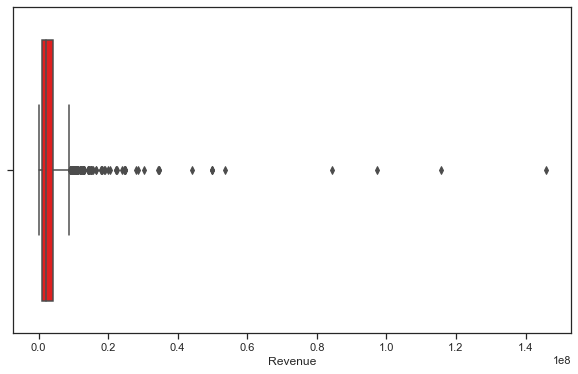

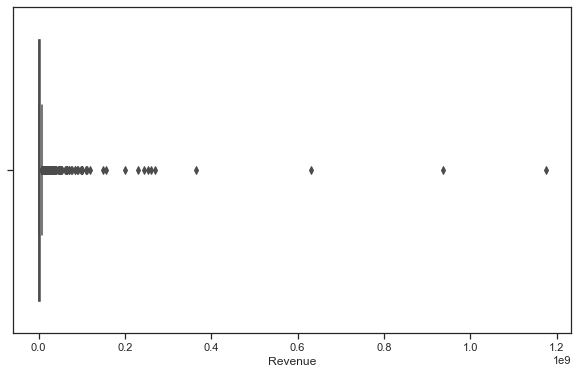

CNT_EMPLOYEE


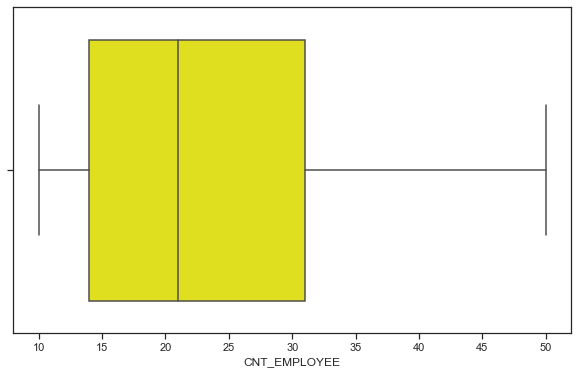

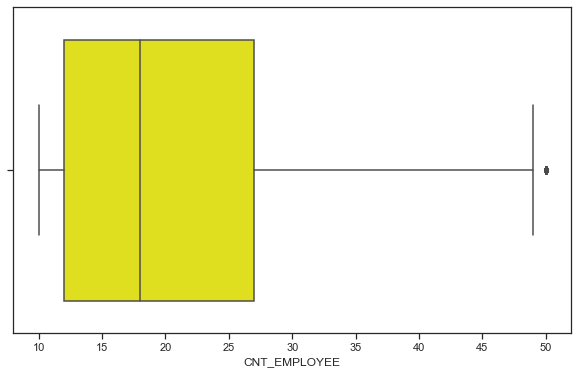

Mobile_potential


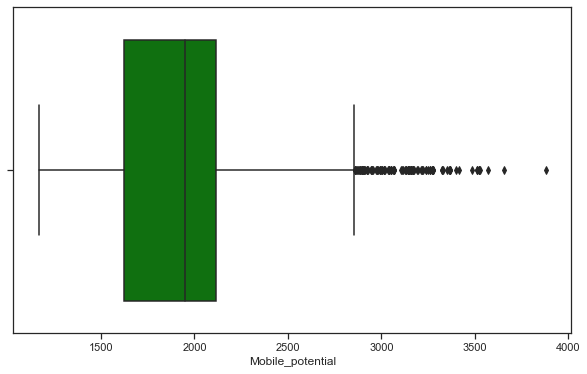

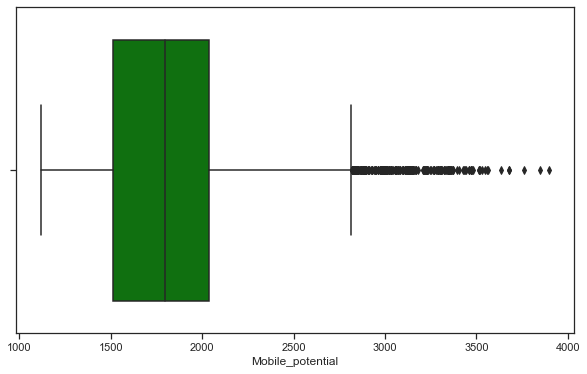

CNT_CB_DENSITY


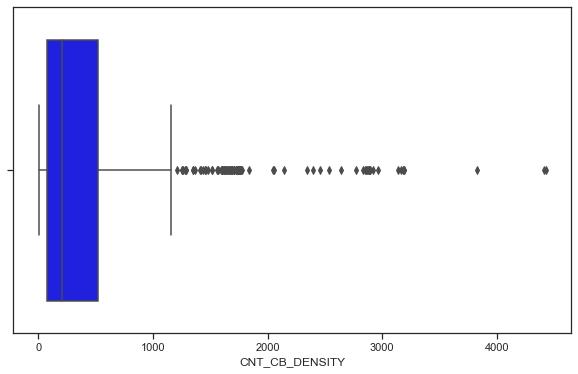

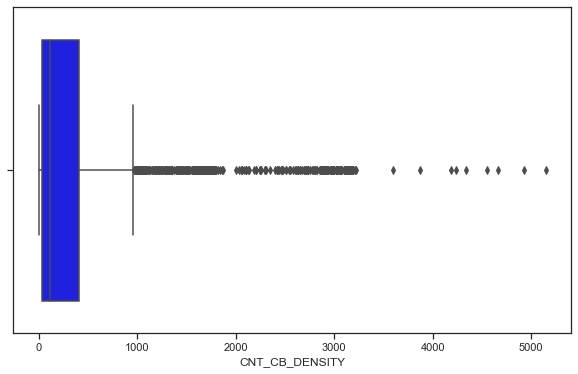

In [264]:
# building customer and non-dataframes according to Customer_Flag 
customer_dt = market_dt[market_dt['Customer_Flag'] == 1]
noncustomer_dt = market_dt[market_dt['Customer_Flag'] == 0]

# get information of new datasets
customer_dt.info()
noncustomer_dt.info()

# feature list
f = ['Revenue', 'CNT_EMPLOYEE','Mobile_potential', 'CNT_CB_DENSITY']
# color list
c = ['red', 'yellow','green', 'blue']


sns.set(rc={'figure.figsize': (10,6)})
sns.set(style="ticks")

#sns.set(rc={'figure.figsize':(20,6)})
## Customer and non-customer boxplots
for i in range(0, len(f)):
    print(f[i])

    sns.boxplot(customer_dt[f[i]], color=c[i])
    plt.show()

    sns.boxplot(noncustomer_dt[f[i]], color=c[i])
    plt.show()


In [265]:
# get statistics for customers
customer_statistcs = customer_dt.describe()
customer_statistcs

,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
count,1111.0,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000
mean,1.0,4.145472e+06,44.445545,14.027003,23.606661,422.532853,396.792979,49.781278,1993.966791
std,0.0,8.413190e+06,17.162090,5.275405,11.252191,586.090259,525.600947,158.550892,506.139594
min,1.0,1.072500e+04,1.000000,3.000000,10.000000,2.000000,2.000000,0.000000,1166.059890
25%,1.0,1.047500e+06,38.000000,14.000000,14.000000,71.500000,70.000000,3.000000,1621.055686
50%,1.0,2.200000e+06,42.000000,14.000000,21.000000,203.000000,200.000000,12.000000,1948.437661
75%,1.0,4.195000e+06,55.000000,14.000000,31.000000,519.000000,506.000000,31.000000,2116.474074
max,1.0,1.458374e+08,85.000000,48.000000,50.000000,4427.000000,3345.000000,2782.000000,3879.520904


In [266]:
# get statistcs for non customers
noncustomer_statistcs = noncustomer_dt.describe()
noncustomer_statistcs

,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential
count,5876.0,5.876000e+03,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000,5876.000000
mean,0.0,4.321201e+06,45.461879,13.603131,20.980259,365.420014,345.007318,40.812798,1821.782634
std,0.0,2.421518e+07,18.053408,6.595324,10.644489,599.272873,552.046015,129.574475,430.125237
min,0.0,1.250000e+03,1.000000,3.000000,10.000000,0.000000,0.000000,0.000000,1119.298955
25%,0.0,9.029860e+05,39.000000,14.000000,12.000000,37.000000,37.000000,2.000000,1513.383597
50%,0.0,1.750000e+06,42.000000,14.000000,18.000000,113.000000,111.000000,6.000000,1797.054278
75%,0.0,3.501124e+06,60.000000,14.000000,27.000000,407.250000,401.000000,23.000000,2035.082840
max,0.0,1.175000e+09,88.000000,50.000000,50.000000,5149.000000,4522.000000,2915.000000,3894.816912


As we observe from the boxplots, some of them present outliers. There are several mechanisms to eliminate outliers. One option is to eliminate the values higher than a statistical value for each numerical variable.

[**EX4**] [**CODE**] Remove the values higher than 5* IQR for each variable: `Revenue`, `CNT_EMPLOYEE`, `Mobile_potential`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`and `CNT_CB_FN_DENSITY`. Compare with the boxplot of the previous exercise [**EX3**] and explain the differences.

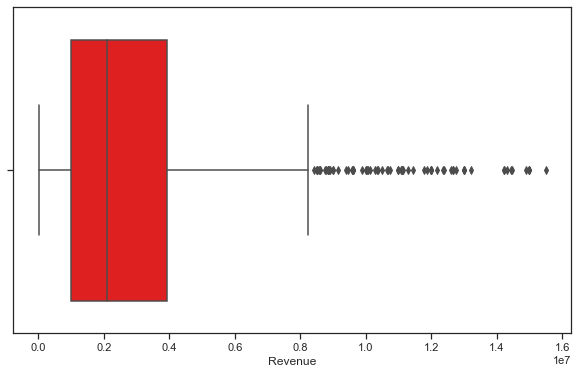

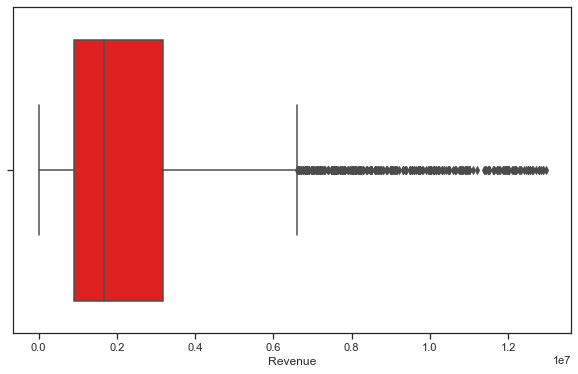

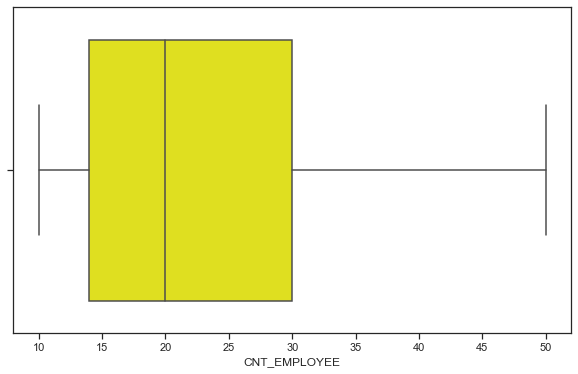

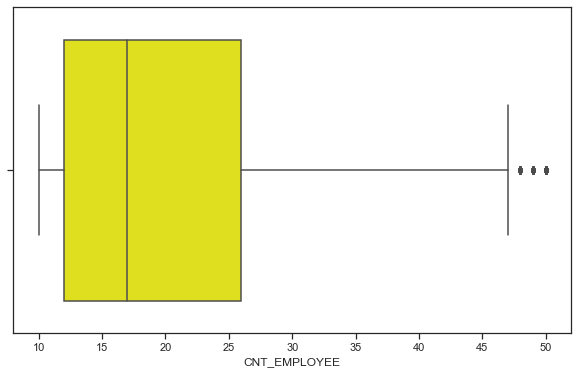

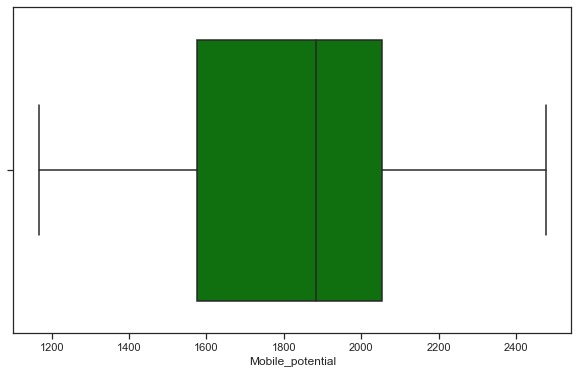

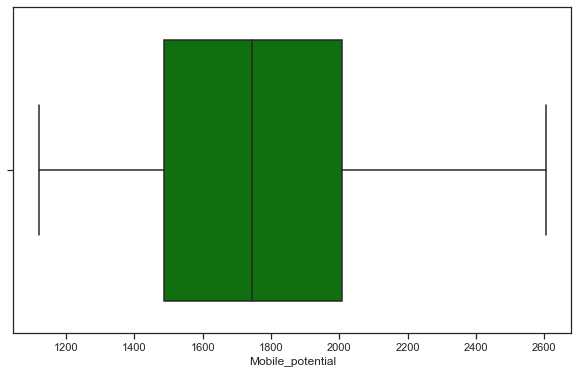

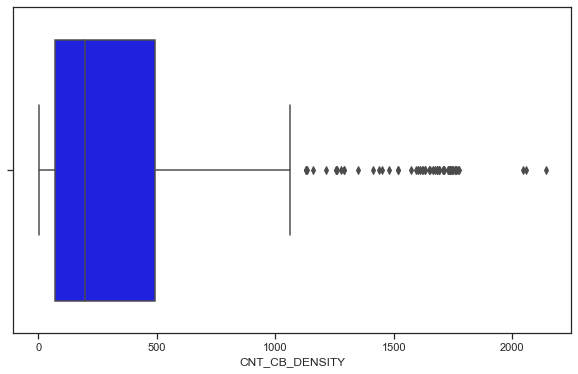

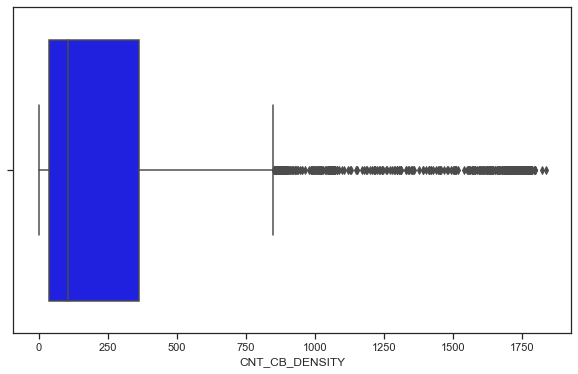

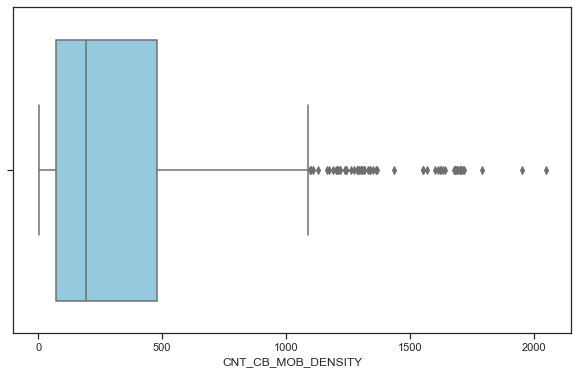

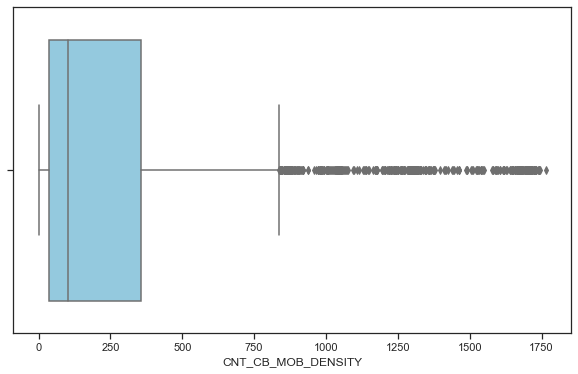

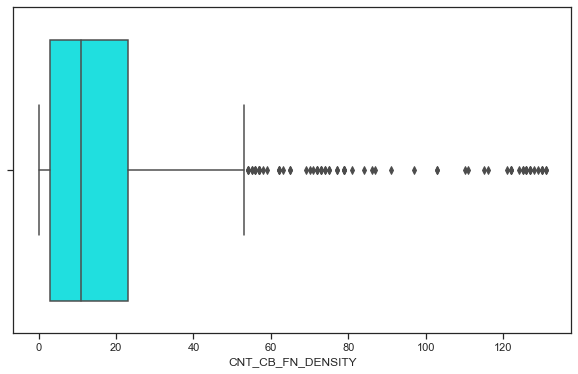

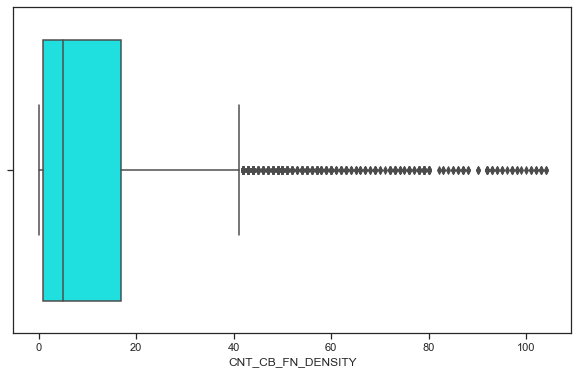

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 11548 to 13321
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                838 non-null    object 
 1   Customer_Flag       838 non-null    int64  
 2   Revenue             838 non-null    float64
 3   Sector              838 non-null    float64
 4   Legal_Form_Code     838 non-null    float64
 5   CNT_EMPLOYEE        838 non-null    int64  
 6   CNT_CB_DENSITY      838 non-null    float64
 7   CNT_CB_MOB_DENSITY  838 non-null    float64
 8   CNT_CB_FN_DENSITY   838 non-null    float64
 9   Mobile_potential    838 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 72.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4833 entries, 5 to 11546
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                4833 no

In [267]:
# feature list
f = ['Revenue', 'CNT_EMPLOYEE','Mobile_potential', 'CNT_CB_DENSITY', 'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY']
# color list
c = ['red', 'yellow','green', 'blue', 'skyblue', 'aqua']

#looping through features, computing iqr of each dataframes and using it to clean data
for i in range(0, len(f)):
    feature = f[i]
    col = c[i]

    # Customers
    q1 = customer_statistcs[feature][4]
    q3 = customer_statistcs[feature][6]
    iqr = q3 - q1
    customer_dt = customer_dt[customer_dt[feature] <= 5*iqr]
    #boxplot
    sns.boxplot(customer_dt[feature], color=col)
    plt.show()

    # Non-Customers
    q1 = noncustomer_statistcs[feature][4]
    q3 = noncustomer_statistcs[feature][6]
    iqr = q3 - q1
    noncustomer_dt = noncustomer_dt[noncustomer_dt[feature] <= 5*iqr]
    #boxplot
    sns.boxplot(noncustomer_dt[feature], color=col)
    plt.show()



# get information of dataset (size, type of variables, nulls,...)
customer_dt.info()
noncustomer_dt.info()



On the other hand, before applying any classification algorithm, it is necessary to transform non-numerical variables. The most common transformations are **coding as integer** or **coding as dummies**. Before deciding the mechanism it is important to analyze, for each categorical variable, their number of different values and their frequencies. In case of high number of possible values in comparision with the size of the dataset, **dummy** transformation could generate sparse matrix.

[**EX5**] [**REPORT**] Calculate the ratio of the values of `City` for `customer_dt` and `noncustomer_dt` datasets. Compare the ratio of each category of each dataset.

In [268]:
# Percentage of distinct values of City
customer_dt_cr = customer_dt['City'].nunique()/len(customer_dt)
noncustomer_dt_cr = noncustomer_dt['City'].nunique()/len(noncustomer_dt)


print("Number of distinct cities/total number of cities in customer_dt: %s" % customer_dt_cr)
print("Number of distinct cities/total number of cities in noncustomer_dt: %s" % noncustomer_dt_cr)

# Ratio of City
ratio_city_cust = customer_dt['City'].value_counts(normalize=True)
ratio_city_non_cust = noncustomer_dt['City'].value_counts(normalize=True)

print("Ratio of the values of City in customer_dt, i.e. |City x| / |City|: \n", ratio_city_cust)
print("Ratio of the values of City in noncustomer_dt, i.e. |City x| / |City|: \n", ratio_city_non_cust)


Number of distinct cities/total number of cities in customer_dt: 0.6002386634844868
Number of distinct cities/total number of cities in noncustomer_dt: 0.4365818332298779
Ratio of the values of City in customer_dt, i.e. |City x| / |City|: 
 München        0.025060
Köln           0.020286
Chemnitz       0.019093
Frankfurt      0.014320
Stuttgart      0.013126
                 ...   
Karben         0.001193
Langenzenn     0.001193
Sternenfels    0.001193
Heidesheim     0.001193
Leubsdorf      0.001193
Name: City, Length: 503, dtype: float64
Ratio of the values of City in noncustomer_dt, i.e. |City x| / |City|: 
 Köln            0.016139
Bremen          0.010139
Stuttgart       0.010139
Dortmund        0.009518
Frankfurt       0.008897
                  ...   
Altlandsberg    0.000207
Burgstetten     0.000207
Kampen          0.000207
Brüggen         0.000207
Gerstetten      0.000207
Name: City, Length: 2110, dtype: float64


As the number of distinct values is high, we will apply a **integer** encoding through the LabelEncoder() transformation as follows:

In [269]:
City_Categ=customer_dt['City'].append(noncustomer_dt['City'])

In [270]:
city_encoder=LabelEncoder()
city_encoder.fit(City_Categ.values)
customer_dt['City_coded']=city_encoder.transform(customer_dt['City'].values)
noncustomer_dt['City_coded']=city_encoder.transform(noncustomer_dt['City'].values)

In [271]:
customer_dt.head()

,City,Customer_Flag,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,City_coded
11548,Haar,1,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,772
11551,Greding,1,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,711
11553,Dörth,1,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,434
11554,Frankfurt,1,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,580
11565,Benningen,1,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,202


[**EX5**] [**CODE**] Finally before entering in the training stage,  let's create a `final_dataset` that is the result of stacking `customer_dt`and `noncustomer_dt`considering the following variables: `City_coded`, `Revenue`, `Sector`, `Legal_Form_Code`, `CNT_EMPLOYEE`, `CNT_CB_DENSITY`, `CNT_CB_MOB_DENSITY`, `CNT_CB_FN_DENSITY`and `Mobile_potential`. The 'final_dataset' should include a new variable, `Target`, that takes value **0** for noncustomers and **1** for customers registers. The `Target` will distiguish the two classes to train the model.

In [272]:
# add collumn Target (equivalent to Customer_Flag)
customer_dt['Target'] = customer_dt['Customer_Flag']
noncustomer_dt['Target'] = noncustomer_dt['Customer_Flag']

# obtain reduced dataframe
customer_dt = pd.concat([customer_dt['City_coded'], customer_dt.drop(['City_coded','City', 'Customer_Flag'], 1)], axis=1)
noncustomer_dt = pd.concat([noncustomer_dt['City_coded'], noncustomer_dt.drop(['City_coded','City', 'Customer_Flag'], 1)], axis=1)


# create final dataset
final_dataset = pd.concat([customer_dt,noncustomer_dt], ignore_index=True)

The output should look like this:

In [273]:
final_dataset.head()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
0,772,4000000.0,42.0,14.0,13,891.0,867.0,62.0,1778.004205,1
1,711,11780000.0,74.0,4.0,50,7.0,7.0,0.0,1899.663564,1
2,434,2050000.0,43.0,14.0,16,30.0,30.0,1.0,1655.520125,1
3,580,853500.0,63.0,14.0,13,870.0,842.0,77.0,1548.507315,1
4,202,10680000.0,74.0,4.0,16,319.0,317.0,10.0,1746.128813,1


In [274]:
final_dataset.tail()

,City_coded,Revenue,Sector,Legal_Form_Code,CNT_EMPLOYEE,CNT_CB_DENSITY,CNT_CB_MOB_DENSITY,CNT_CB_FN_DENSITY,Mobile_potential,Target
5666,722,6391606.0,60.0,20.0,19,57.0,57.0,0.0,2006.059998,0
5667,1836,305000.0,60.0,4.0,13,9.0,9.0,0.0,1231.304840,0
5668,584,4200000.0,23.0,14.0,50,62.0,62.0,6.0,1958.236002,0
5669,1882,1336495.0,60.0,16.0,16,63.0,61.0,2.0,1703.188202,0
5670,966,4593054.0,64.0,14.0,41,90.0,90.0,5.0,1985.888315,0


To measure the quality of our classifiers, it is necessary to train and test the models with different datasets. For this objective we will use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to generate 4 new datasets: 2 for training and 2 for test: 
- `X_train`: contains all variables except `Target` for the 80% of `final_dataset`,
- `y_train`: contains `Target`variables for the 80% of `final_dataset`, 
- `X_test`: contains all variables except `Target` for the 20% of `final_dataset`,
- `y_test`: contains `Target`variables for the 20% of `final_dataset`.

In [275]:
# extract data for training and testing 
X_train, X_test, y_train, y_test= train_test_split (final_dataset.iloc[:,:-1], final_dataset.iloc[:,-1], test_size=0.20, random_state=42)

[**EX6**] [**REPORT**] Calculate the lenght of `X_train` and `X_test` datasets. Is it aligned with the `test_size`value selected in the split?

In [276]:
#they are indeed 66% for training and 33% for testing
print("Length of training dataset: %s" % len(X_train))
print("Length of testing dataset: %s" % len(X_test))

Length of training dataset: 4536
Length of testing dataset: 1135


[**EX7**] [**REPORT**] Draw the histograms of `y_train`and `y_test`. Is the dataset balanced (similar number of rows for each class or Target) or imbalanced ? How do you think it could affect to quality of the classifier?

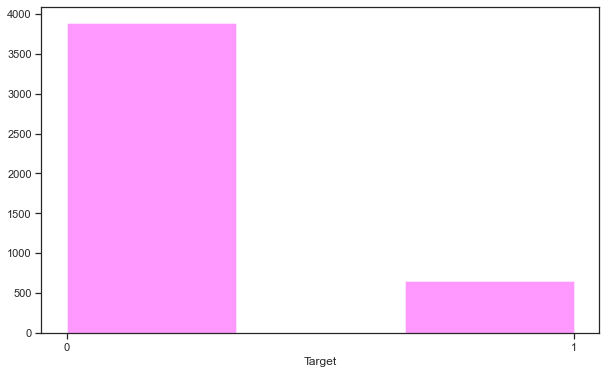

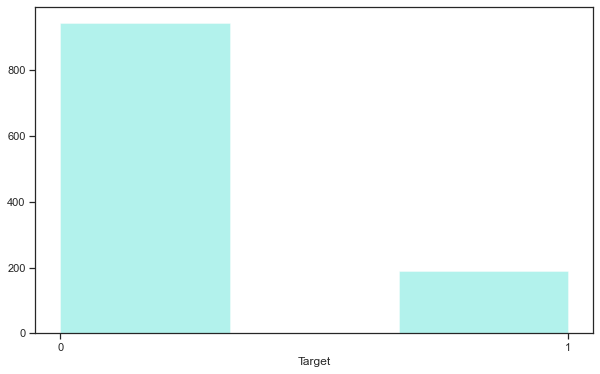

In [277]:
# distribution y_train
fig = plt.figure(0)
sns.distplot(y_train, kde=False, color = "magenta", bins = 3)
plt.xticks([0,1])
plt.show()

# distribution y_test
fig = plt.figure(1)
sns.distplot(y_test, kde=False, color = "turquoise", bins = 3)
plt.xticks([0,1])
plt.show()

# 2. Model Training: from baseline models to ensemble¶

Now we are ready to enter in the training stage of the machine learning models. The common way to procedure is starting with baseline models (i.e. SVM, Decision Trees, Naive Bayes, etc....) and later, try to improve it adjusting hyperparameters of the models or creating more complex models architectures as ensembles.

## 2.1. Baseline of models: Training and evaluation

In the following section we are training a SVM, Decision Tree and Naive Bayes algorithms. To do it, we will use the `X_train`and `y_train`datasets.
Later on we will evaluate the performance (i.e. **accuracy**, **confusion matrix**, **recall** and **precision**) of each model with the `test`dataset, i.e. `X_test`and `y_test`.


Tip 1: You may use [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from Sklearn library to calculate the **precision**, **recall** of the model.

Tip 2: You may use [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) from Sklearn library to calculate the confusion matrix of a model.

Tip 3: When using Sklearn library, you may use the function **.score(X_test, y_test)** to calculate the accuracy value.

### Classification with a SVM model

[**EX8**] [**CODE**] Train the SVM classifier of the Sklearn library. Evaluate the following metrics for kernel="rbf":
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is the algorithm classifying both classes (Target=0 and Target=1) in a similar way? Why?
- Compare the **precision** and **recall** of the **training** dataset (i.e.`X_train`and `y_train`) vs the **test** dataset (i.e. `X_test`and `y_test`). Which is better? Why? Which is the correct measure to estimate the performance for other unseen datasets? Why?

In [278]:
# Creating and fitting the model
svm_model = SVC(kernel='rbf').fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = svm_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", svm_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = svm_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", svm_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))



>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      3888
           1       1.00      0.01      0.02       648

    accuracy                           0.86      4536
   macro avg       0.93      0.51      0.47      4536
weighted avg       0.88      0.86      0.80      4536

accuracy:  0.8589065255731922
confusion matrix:
 [[3888    0]
 [ 640    8]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       945
           1       1.00      0.01      0.01       190

    accuracy                           0.83      1135
   macro avg       0.92      0.50      0.46      1135
weighted avg       0.86      0.83      0.76      1135

accuracy:  0.8334801762114538
confusion matrix:
 [[945   0]
 [189   1]]


### Classification with a Decision Tree model

[**EX9**] [**CODE**] Train the Decision Tree algorithm from Sklearn library. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Decision Tree algorithm working better than SVM? Why?

In [279]:
#NO MAX DEPTH
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = dt_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", dt_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = dt_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", dt_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3888
           1       1.00      1.00      1.00       648

    accuracy                           1.00      4536
   macro avg       1.00      1.00      1.00      4536
weighted avg       1.00      1.00      1.00      4536

accuracy:  1.0
confusion matrix:
 [[3888    0]
 [   0  648]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       945
           1       0.32      0.31      0.31       190

    accuracy                           0.77      1135
   macro avg       0.59      0.59      0.59      1135
weighted avg       0.77      0.77      0.77      1135

accuracy:  0.7726872246696035
confusion matrix:
 [[819 126]
 [132  58]]


In [280]:
#PRUNED TREE, MAX_DEPTH = 8
dt_model_max_depth = DecisionTreeClassifier(max_depth=8).fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = dt_model_max_depth.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", dt_model_max_depth.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = dt_model_max_depth.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", dt_model_max_depth.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      3888
           1       0.96      0.12      0.22       648

    accuracy                           0.87      4536
   macro avg       0.92      0.56      0.57      4536
weighted avg       0.89      0.87      0.83      4536

accuracy:  0.8738977072310405
confusion matrix:
 [[3885    3]
 [ 569   79]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       945
           1       0.52      0.06      0.10       190

    accuracy                           0.83      1135
   macro avg       0.68      0.52      0.51      1135
weighted avg       0.79      0.83      0.77      1135

accuracy:  0.8334801762114538
confusion matrix:
 [[935  10]
 [179  11]]


### Classification with a Naive Bayes model

[**EX10**] [**CODE**] Build and train your own Naive Bayes algorithm. Evaluate the following metrics:
- Which is **precision**, **recall** and **accuracy** of the algorithm?
- Which is the **confusion matrix**?
- Is Naive Bayes algorithm working better than SVM and Decision Tree? Why?
- Repeat the training and evaluation using the Sklearn library' Naive Bayes algorithm. Evaluate the **precision**, **recall**, **accuracy** and **confusion matrix**. Are these metrics similar to your model?
- Plot the histograms of the probabilities resulting of the prediction for class 0 and class 1. Are both density charts overlapping? Why? In case of overlapping, which is the effect in the classification between **customers** (i.e. Target=1) and **noncustomer** (i.e. Target=0)?

Tip 1: When using Sklearn library, you may use **.predict_proba(X_test)** to get the probabilities or scores resulting from the prediction. 

>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      3888
           1       0.23      0.16      0.19       648

    accuracy                           0.80      4536
   macro avg       0.55      0.53      0.54      4536
weighted avg       0.78      0.80      0.79      4536

accuracy:  0.8033509700176367
confusion matrix:
 [[3542  346]
 [ 546  102]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       945
           1       0.29      0.18      0.23       190

    accuracy                           0.79      1135
   macro avg       0.57      0.55      0.55      1135
weighted avg       0.75      0.79      0.77      1135

accuracy:  0.788546255506608
confusion matrix:
 [[860  85]
 [155  35]]


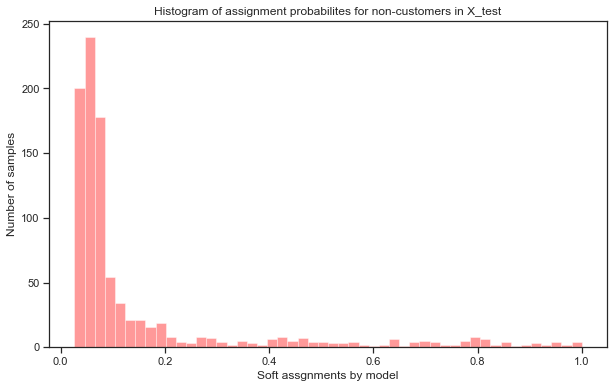

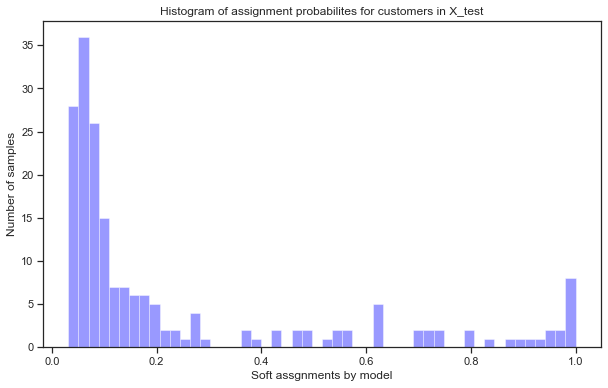

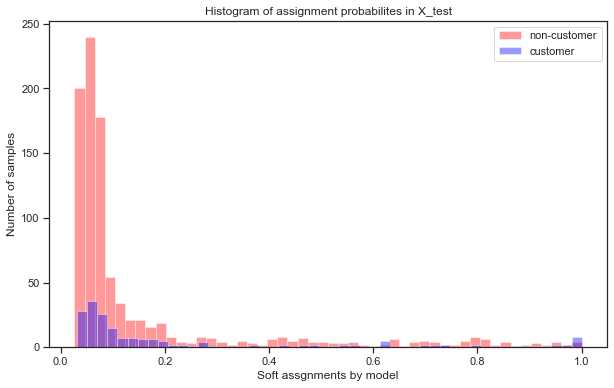

In [281]:
# Naive Bayes
nb_model = GaussianNB().fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = nb_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", nb_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = nb_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", nb_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


## Histograms of assignment probabilites
# get probabilities
pred_probs = nb_model.predict_proba(X_test)
preds = np.concatenate((pred_probs[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis=1)

# separate probabilities for customers and non-customers
preds_0 = preds[preds[:,1] == 0]
preds_1 = preds[preds[:,1] == 1]

# plot probabilities for non-customers
fig = plt.figure(0)
sns.distplot(preds_0[:,0], kde=False, color='red', bins=50)
plt.title('Histogram of assignment probabilites for non-customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for customers
fig = plt.figure(1)
sns.distplot(preds_1[:,0], kde=False, color='blue', bins=50)
plt.title('Histogram of assignment probabilites for customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for all samples seperated by customer and non-customer
fig = plt.figure(3)
sns.distplot(preds_0[:,0], kde=False, color='red', label="non-customer", bins=50)
sns.distplot(preds_1[:,0], kde=False, color='blue', label="customer", bins=50)
plt.title('Histogram of assignment probabilites in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

### Comparing algorithm consistenly: KFold cross-validation

When we are looking for the best algorithm to classify a dataset, it is very useful to compare all of them. Besides, to protect the training from **overfitting** and calculate the performance with less variance than a single train-test split, it is uselful to apply **K-Fold cross-validation**. The way that KFolds works is splitting the dataset into k-parts or **fold** (e.g. k = 3, 5 or k = 10). The algorithm is trained on k − 1 folds with one held back and tested on the held back fold.

[**EX11**] [**CODE**] Train a SVM, Decision Tree and Naive Bayes algorithms using a KFold cross-validation with **k=5** and calculate the **mean** and **standard deviation** of the **accuracy**. Plot a boxplot of the accuracy for every model. Which is the model with better mean value of the accuracy? Which is the algorithm with less deviation on the accuracy?  

Tip 1: You may use [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to apply cross-validation.

In [282]:
# Models definition
models=[]
models.append(('SVM', SVC(kernel='rbf')))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Decision_trees', DecisionTreeClassifier()))

# Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=5, random_state=10)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.858910869449072 and accuracy (std): 0.012553735955727617
Model Naive_Bayes with accuracy (mean): 0.8044623559296514 and accuracy (std): 0.023145053864132775
Model Decision_trees with accuracy (mean): 0.7835078610319152 and accuracy (std): 0.008573097411131205


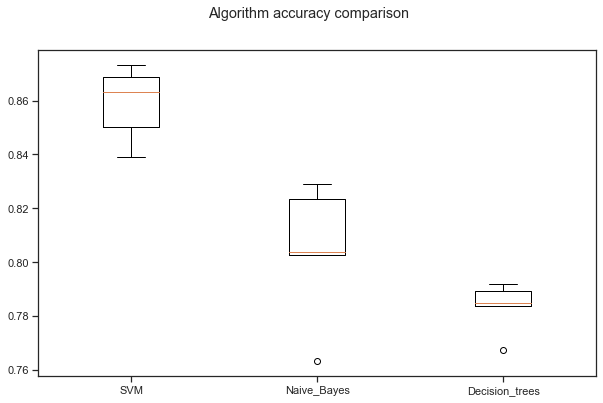

In [283]:
# Boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

The output of the boxplots should look like this:

In [284]:
# Models definition
models=[]
models.append(('SVM', SVC(kernel='rbf')))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Decision_trees', DecisionTreeClassifier(max_depth=8))) 

# Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=5, random_state=10)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.858910869449072 and accuracy (std): 0.012553735955727617
Model Naive_Bayes with accuracy (mean): 0.8044623559296514 and accuracy (std): 0.023145053864132775
Model Decision_trees with accuracy (mean): 0.8525166473196721 and accuracy (std): 0.013612564634305088


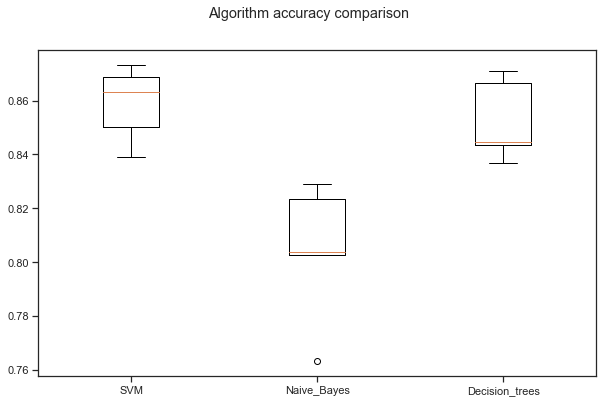

In [285]:
# Boxplot for algorithm comparison
fig=pyplot.figure()
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 2.2 Improving the model

As we observe from the baseline models, even though the accuracy is over 70% the classifiers don't distinguish properly both classes, i.e. **Target=1** and **Target=0**.  
In this scenario, we should apply another strategies to improve the perfomance. There are several options: from adjusting the balance of the classes or doing the fine tuning of the hyperparameters of the models (for instance the type of kernel in SVM or the minimum number of samples per leaf in Decision Tree) to combine differents models to create ensembles.
In this section, we will evaluate our classifiers in two ways:
- Forcing the balancing of both classes
- Building ensembles of models

### Balancing the dataset

Let's check the type of balancing we have in our training and test datasets.

[**EX12**][**CODE**] Split the previous `final_dataset`in two datasets: `customer_dt` for class 1 and `noncustomer_dt`for class 0. Calculate the number of samples for the **customers** class (i.e. Target=1) and for the **noncustomers** class (i.e. Target=0). Is the `final_dataset`balanced or imbalanced? Explain two options to match both datasets.


In [286]:
print("Number of customers: %s" % len(customer_dt))
print("Number of non-customers: %s" % len(noncustomer_dt))

#1)we could cut the number of non customer samples that we use for training down to about 800 (randomly), so both datasets have the same size. 
#2)weight each sample according to each class (<1 for non-customers, >1 for customers)
#3)Increase the size of the customer set by repeating samples



Number of customers: 838
Number of non-customers: 4833


Let's undersample the `noncustomer_dt` to balance both datasets:

In [287]:
# Undersample non-customer dataset
noncustomer_dt_sample=noncustomer_dt.sample(840)
print("The new number of samples in noncustomer dataset is:", len(noncustomer_dt_sample))

The new number of samples in noncustomer dataset is: 840


If we append both datasets, the **customer_dt** and the **noncustomer_dt_sample**, the new `final_dataset`looks like:

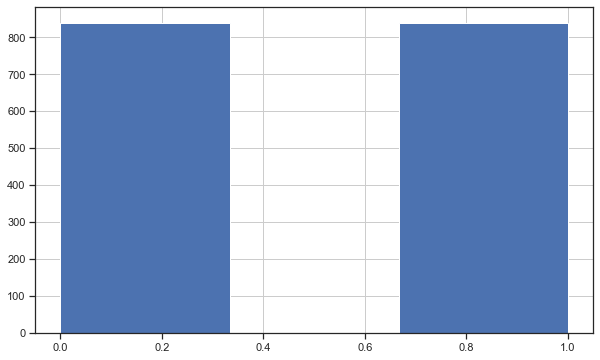

In [288]:
# Check that data is balanced
balanced_dataset=customer_dt.append(noncustomer_dt_sample).reset_index().drop('index', axis=1)
balanced_dataset=balanced_dataset.loc[:,['City_coded', 'Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENSITY', 'Mobile_potential','Target']]
balanced_dataset.Target.hist(bins=3)

[**EX13**] [**CODE**][**REPORT**] Train a SVC, Decision Tree and Naive Bayes algorithm with the new `final_dataset`. Evaluate the **recall**, **precision** and **confusion matrix** of all 3 models.
- Which has better accuracy?
- Which is the model with better recall? And accuracy?
- Which model you recommend to classify both classes? Justify your answer

In [289]:
#building new training and testing subsets
X_train, X_test, y_train, y_test= train_test_split (balanced_dataset.iloc[:,:-1], balanced_dataset.iloc[:,-1], test_size=0.20, random_state=42)


In [290]:
# SVM
svm_model = SVC(kernel='rbf').fit(X_train,y_train)


# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = svm_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", svm_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = svm_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", svm_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.54      0.67      0.60       675
           1       0.56      0.42      0.48       667

    accuracy                           0.55      1342
   macro avg       0.55      0.55      0.54      1342
weighted avg       0.55      0.55      0.54      1342

accuracy:  0.5461997019374069
confusion matrix:
 [[455 220]
 [389 278]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.52      0.68      0.59       165
           1       0.57      0.40      0.47       171

    accuracy                           0.54       336
   macro avg       0.54      0.54      0.53       336
weighted avg       0.54      0.54      0.53       336

accuracy:  0.5386904761904762
confusion matrix:
 [[112  53]
 [102  69]]


In [291]:
# Decission Tree
dt_model = DecisionTreeClassifier().fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = dt_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", dt_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = dt_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", dt_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       675
           1       1.00      1.00      1.00       667

    accuracy                           1.00      1342
   macro avg       1.00      1.00      1.00      1342
weighted avg       1.00      1.00      1.00      1342

accuracy:  1.0
confusion matrix:
 [[675   0]
 [  0 667]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.59      0.56      0.57       165
           1       0.59      0.62      0.61       171

    accuracy                           0.59       336
   macro avg       0.59      0.59      0.59       336
weighted avg       0.59      0.59      0.59       336

accuracy:  0.5892857142857143
confusion matrix:
 [[ 92  73]
 [ 65 106]]


In [292]:
# PRUNED Decision Tree, MIN_SAMPLES_LEAF = 8
dt_model_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=8).fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = dt_model_min_samples_leaf.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", dt_model_min_samples_leaf.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = dt_model_min_samples_leaf.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", dt_model_min_samples_leaf.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.76      0.84      0.80       675
           1       0.82      0.73      0.77       667

    accuracy                           0.79      1342
   macro avg       0.79      0.79      0.79      1342
weighted avg       0.79      0.79      0.79      1342

accuracy:  0.7868852459016393
confusion matrix:
 [[566 109]
 [177 490]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.58      0.66      0.62       165
           1       0.62      0.54      0.58       171

    accuracy                           0.60       336
   macro avg       0.60      0.60      0.60       336
weighted avg       0.60      0.60      0.60       336

accuracy:  0.6011904761904762
confusion matrix:
 [[109  56]
 [ 78  93]]


In [293]:
# Naive Bayes
nb_model = GaussianNB().fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = nb_model.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", nb_model.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = nb_model.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", nb_model.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.53      0.79      0.64       675
           1       0.59      0.30      0.40       667

    accuracy                           0.55      1342
   macro avg       0.56      0.55      0.52      1342
weighted avg       0.56      0.55      0.52      1342

accuracy:  0.5469448584202683
confusion matrix:
 [[532 143]
 [465 202]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.55      0.81      0.65       165
           1       0.66      0.36      0.46       171

    accuracy                           0.58       336
   macro avg       0.60      0.58      0.56       336
weighted avg       0.60      0.58      0.56       336

accuracy:  0.5773809523809523
confusion matrix:
 [[133  32]
 [110  61]]


In [294]:
#Models definition
models=[]
models.append(('SVM', SVC(kernel='rbf')))
models.append(('Naive_Bayes', GaussianNB()))
models.append(('Decision_trees normal', DecisionTreeClassifier()))
models.append(('Decision_trees min samples', DecisionTreeClassifier(min_samples_leaf=8)))
models.append(('Decision_trees max depth', DecisionTreeClassifier(max_depth=10)))
#Evaluate each models
results=[]
names=[]
scoring_metric='accuracy'
for name_model, model in models:
    kfold= KFold(n_splits=10, random_state=10)
    cv_results=cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring_metric)
    results.append(cv_results)
    names.append(name_model)
    print ("Model", name_model, "with accuracy (mean):", cv_results.mean(), "and accuracy (std):", cv_results.std())

Model SVM with accuracy (mean): 0.550718629076838 and accuracy (std): 0.0421511640264284
Model Naive_Bayes with accuracy (mean): 0.5454394693200663 and accuracy (std): 0.03402102433223859
Model Decision_trees normal with accuracy (mean): 0.575992260917634 and accuracy (std): 0.031186452658607717
Model Decision_trees min samples with accuracy (mean): 0.563355444997236 and accuracy (std): 0.028836117636390966
Model Decision_trees max depth with accuracy (mean): 0.5685185185185185 and accuracy (std): 0.02964231482209411


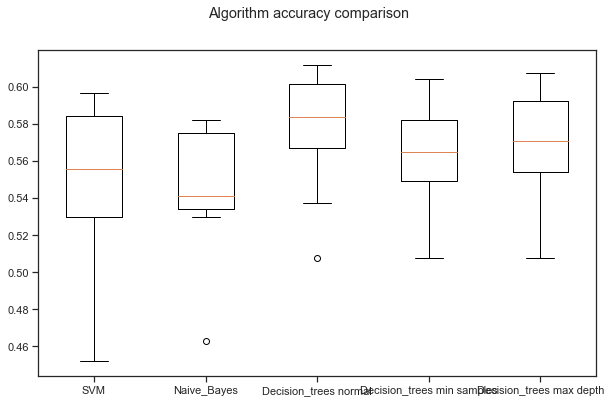

In [295]:
#boxplot for algorithm comparison
fig=pyplot.figure()
#sns.set(rc={'figure.figsize':(20,6)})
fig.suptitle ("Algorithm accuracy comparison")
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

[**EX14**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Naive Bayes model for class 0 and class 1. Are still both density charts overlapping? will the model classifying better than with the imbalanced dataset? Justify your answer.

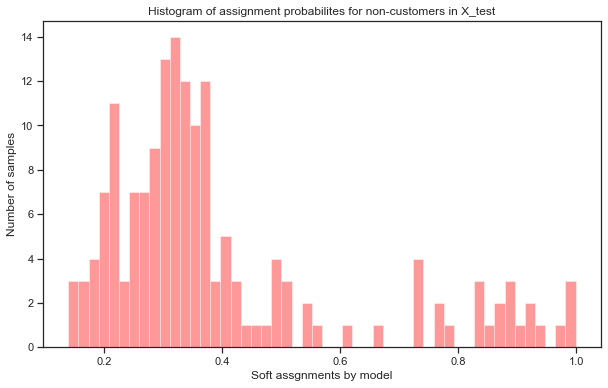

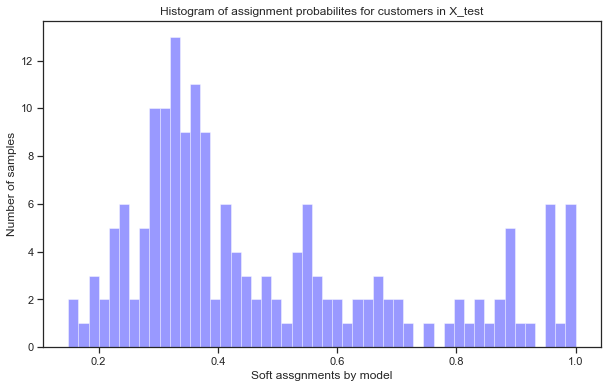

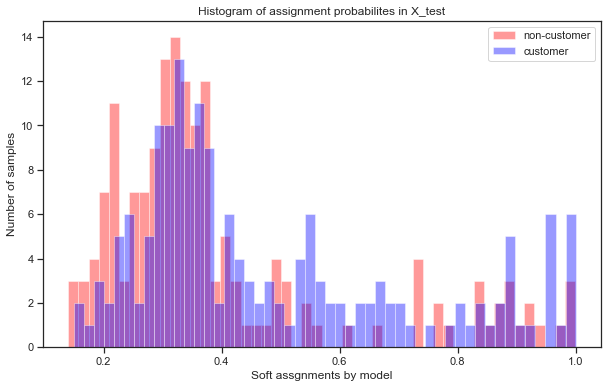

In [296]:
## Histograms of assignment probabilites
# get probabilities
pred_probs = nb_model.predict_proba(X_test)
preds = np.concatenate((pred_probs[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis=1)

# separate probabilities for customers and non-customers
preds_0 = preds[preds[:,1] == 0]
preds_1 = preds[preds[:,1] == 1]

# plot probabilities for non-customers
fig = plt.figure(0)
sns.distplot(preds_0[:,0], kde=False, color='red', bins=50)
plt.title('Histogram of assignment probabilites for non-customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for customers
fig = plt.figure(1)
sns.distplot(preds_1[:,0], kde=False, color='blue', bins=50)
plt.title('Histogram of assignment probabilites for customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for all samples seperated by customer and non-customer
fig = plt.figure(3)
sns.distplot(preds_0[:,0], kde=False, color='red', label="non-customer", bins=50)
sns.distplot(preds_1[:,0], kde=False, color='blue', label="customer", bins=50)
plt.title('Histogram of assignment probabilites in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

The cut-off is the **threshold of the probability of the prediction** to assign to class 0 or class 1 the prediction. If probability > cut-off, the model classifies as 1; otherwise, model classifies as 0. 
The cut-off is a value that can be adjusted to increase the recall or the precision. Usually, there is a **trade-off** between improving the recall-precision.

[**EX15**][**CODE**][**REPORT**] Execute the prediction for `X_test` and create a new `y_pred_modification` that takes value 1, if `y_pred_proba`> cutoff and otherwise, `y_pred_modification`=0. Repeat the process for 5 values of cutoff=0.4, 0.5, 0.6, 0.8 and 0.9.  Calculate the **precision**, **recall** and **confusion matrix** for each iteration. Which is the best cutoff value to optimize **precision** of class 1? and for **recall** of class 1?

In [297]:
# Possible cutoffs
cuttoffs = [0.4, 0.5, 0.6, 0.8, 0.9]

# Try all cutoffs
for co in cuttoffs:
    y_pred = nb_model.predict_proba(X_test)
    y_pred_modification = []

    # assign target prediction relative to cutoff 
    for p in y_pred[:,1]:
        if p > co:
            y_pred_modification.append(1) # customer
        else: 
            y_pred_modification.append(0) # non-customer
    
    # get model evaluation
    print(">> cutoff at ", co)
    print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred_modification))
    print("\nclassification report:\n", classification_report(y_test, y_pred_modification))

>> cutoff at  0.4

confusion matrix:
 [[119  46]
 [ 89  82]]

classification report:
               precision    recall  f1-score   support

           0       0.57      0.72      0.64       165
           1       0.64      0.48      0.55       171

    accuracy                           0.60       336
   macro avg       0.61      0.60      0.59       336
weighted avg       0.61      0.60      0.59       336

>> cutoff at  0.5

confusion matrix:
 [[133  32]
 [110  61]]

classification report:
               precision    recall  f1-score   support

           0       0.55      0.81      0.65       165
           1       0.66      0.36      0.46       171

    accuracy                           0.58       336
   macro avg       0.60      0.58      0.56       336
weighted avg       0.60      0.58      0.56       336

>> cutoff at  0.6

confusion matrix:
 [[139  26]
 [126  45]]

classification report:
               precision    recall  f1-score   support

           0       0.52      0.84

[**EX16**][**REPORT**] The Marketing campaigns to capture new customers, the **False Positives**, i.e. class 0 samples that are predicted as class 1, are used as the output of prediction to build the list of **non customers** to be called by sales managers. In your opinion, which is the best **cutoff** value from the previous scenarios and how many **non customers** will be sent to sales managers to visit to sell our products? Justify your response.

### Ensembling models

Another mechanism to improve the performance of a classifier is to combine several algorithms. The three most popular methods for combining models are:
- Bagging combines multiple models that are trained with different subsamples of the training dataset.
- Boosting combines multiple models in cascade and each of them learns to fix the prediction errors of the prior model.
- Voting combines statistically the output of several models.

Usually Bagging and Boosting are formed by models of the same type meanwhile voting could be formed by different models.

### Voting ensemble

[**EX17**][**CODE**][**REPORT**] Build a **voting** ensemble formed by a SVM, Naive Bayes and Decision Tree and train it with the balanced training dataset. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [VotingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html) to build this type of ensemble.

In [298]:
# SVM model
svm_model = SVC()
# Decission Tree model
dt_model = DecisionTreeClassifier(min_samples_leaf=8)
# Naive Bayes model 
nb_model = GaussianNB()

# combine models to Voting Classifier
vc = VotingClassifier(estimators=[('svm',svm_model),('dt',dt_model),('nb',nb_model)])
vc.fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = vc.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", vc.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = vc.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", vc.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))

>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.60      0.81      0.69       675
           1       0.71      0.46      0.55       667

    accuracy                           0.64      1342
   macro avg       0.66      0.64      0.62      1342
weighted avg       0.66      0.64      0.62      1342

accuracy:  0.6363636363636364
confusion matrix:
 [[550 125]
 [363 304]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.56      0.76      0.64       165
           1       0.65      0.43      0.51       171

    accuracy                           0.59       336
   macro avg       0.60      0.59      0.58       336
weighted avg       0.60      0.59      0.58       336

accuracy:  0.5892857142857143
confusion matrix:
 [[125  40]
 [ 98  73]]


### Bagging ensemble: Random Forest

[**EX18**][**CODE**][**REPORT**] Build a **Bagging** ensemble based on Random Forest. Random Forest is considered a bagging ensemble formed by Decision Trees algorithms. Train the Random Forest with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to build this type of ensemble.

In [299]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10,min_samples_leaf=8)
rf.fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = rf.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", rf.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = rf.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", rf.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       675
           1       0.80      0.79      0.79       667

    accuracy                           0.80      1342
   macro avg       0.80      0.80      0.80      1342
weighted avg       0.80      0.80      0.80      1342

accuracy:  0.797317436661699
confusion matrix:
 [[546 129]
 [143 524]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.60      0.61      0.61       165
           1       0.62      0.61      0.61       171

    accuracy                           0.61       336
   macro avg       0.61      0.61      0.61       336
weighted avg       0.61      0.61      0.61       336

accuracy:  0.6101190476190477
confusion matrix:
 [[101  64]
 [ 67 104]]


[**EX19**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the Random Forest model for class 0 and class 1. Compare it with histogram of Naive Bayes. Which one classifies better from your point of view? Why? Which is the value of the **cutoff** from which the Random Forest distinguishes better the class 1 from class 0? 

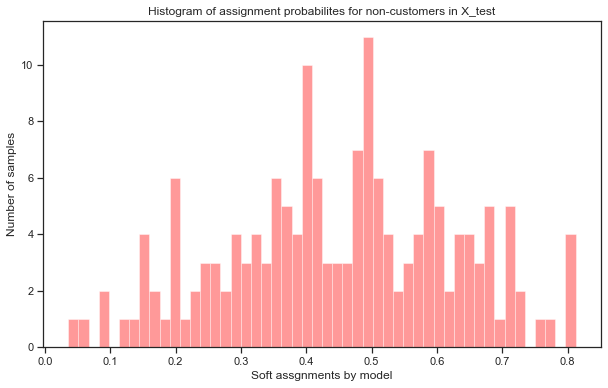

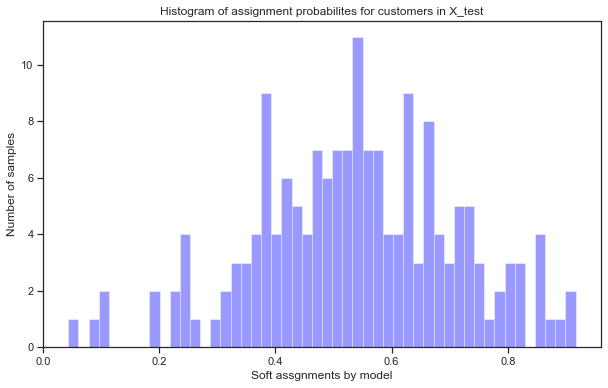

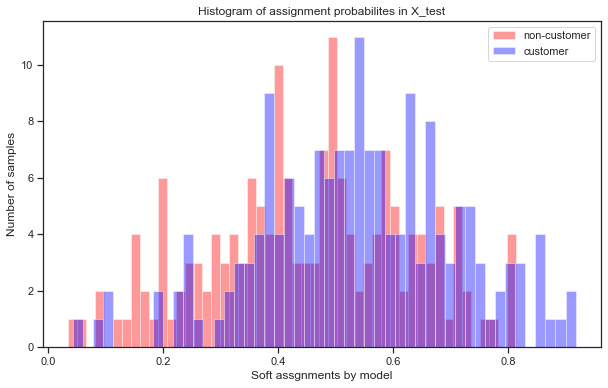

In [300]:
## Histograms of assignment probabilites
# get probabilities
pred_probs = rf.predict_proba(X_test)
preds = np.concatenate((pred_probs[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis=1)

# separate probabilities for customers and non-customers
preds_0 = preds[preds[:,1] == 0]
preds_1 = preds[preds[:,1] == 1]

# plot probabilities for non-customers
fig = plt.figure(0)
sns.distplot(preds_0[:,0], kde=False, color='red', bins=50)
plt.title('Histogram of assignment probabilites for non-customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for customers
fig = plt.figure(1)
sns.distplot(preds_1[:,0], kde=False, color='blue', bins=50)
plt.title('Histogram of assignment probabilites for customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for all samples seperated by customer and non-customer
fig = plt.figure(3)
sns.distplot(preds_0[:,0], kde=False, color='red', label="non-customer", bins=50)
sns.distplot(preds_1[:,0], kde=False, color='blue', label="customer", bins=50)
plt.title('Histogram of assignment probabilites in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

### Boosting ensemble: Gradient Tree Boosting

[**EX20**][**CODE**][**REPORT**] Build a **Boosting** ensemble based on Gradient Tree Boosting (GBT). There are several boosting algorithms as Adaboost, etc.  Train the GBT with the balanced training dataset, i.e. `X_train` and `y_train`. Calculate the **precision**, **recall** and **confusion matrix** of the new classifier. Is it better than any of the previous baseline models? Justify your answer.

Tip: You may use [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) to build this type of ensemble.

In [301]:
# Gradient Tree Boosting
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

# Training data
print(">> TRAINING DATA <<\n")
y_pred_train = gbc.predict(X_train)
print("classification report: \n", classification_report(y_train,y_pred_train))
print("accuracy: ", gbc.score(X_train, y_train))
print("confusion matrix:\n", confusion_matrix(y_train,y_pred_train))


# Testing data
print("\n>> TESTING DATA <<\n")
y_pred_test = gbc.predict(X_test)
print("classification report: \n", classification_report(y_test,y_pred_test))
print("accuracy: ", gbc.score(X_test, y_test))
print("confusion matrix:\n", confusion_matrix(y_test,y_pred_test))


>> TRAINING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       675
           1       0.76      0.82      0.79       667

    accuracy                           0.78      1342
   macro avg       0.78      0.78      0.78      1342
weighted avg       0.78      0.78      0.78      1342

accuracy:  0.7794336810730254
confusion matrix:
 [[498 177]
 [119 548]]

>> TESTING DATA <<

classification report: 
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       165
           1       0.62      0.70      0.66       171

    accuracy                           0.63       336
   macro avg       0.63      0.63      0.63       336
weighted avg       0.63      0.63      0.63       336

accuracy:  0.6309523809523809
confusion matrix:
 [[ 93  72]
 [ 52 119]]


[**EX21**][**REPORT**] Plot the histograms of the probabilities resulting of the prediction of the GBT model for class 0 and class 1. Compare it with histogram of Naive Bayes and Random Forest. Which one classifies better from your point of view? Why? Which is the value of the **cutoff** from which the GBT distinguishes better the class 1 from class 0? 

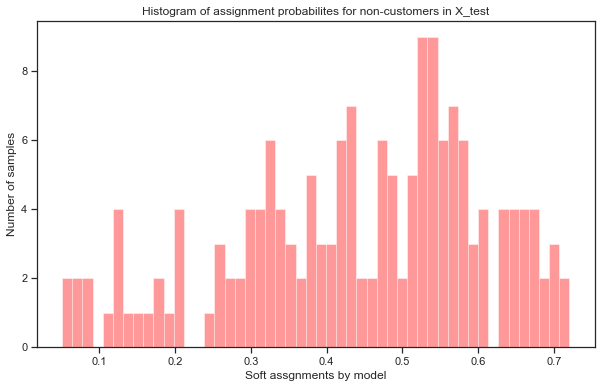

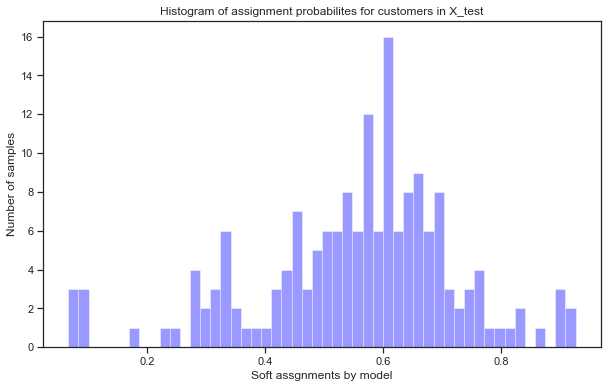

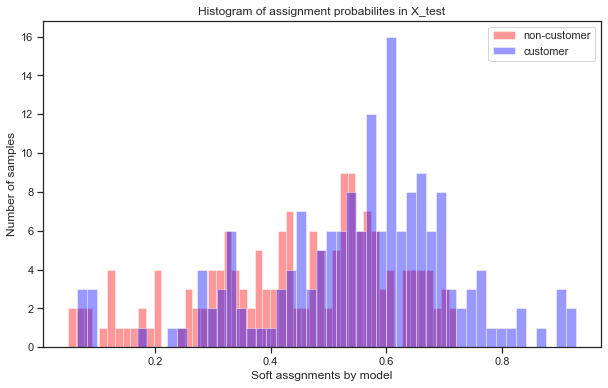

In [302]:
## Histograms of assignment probabilites
# get probabilities
pred_probs = gbc.predict_proba(X_test)
preds = np.concatenate((pred_probs[:,1].reshape(-1,1), np.asarray(y_test).reshape(-1,1)), axis=1)

# separate probabilities for customers and non-customers
preds_0 = preds[preds[:,1] == 0]
preds_1 = preds[preds[:,1] == 1]

# plot probabilities for non-customers
fig = plt.figure(0)
sns.distplot(preds_0[:,0], kde=False, color='red', bins=50)
plt.title('Histogram of assignment probabilites for non-customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for customers
fig = plt.figure(1)
sns.distplot(preds_1[:,0], kde=False, color='blue', bins=50)
plt.title('Histogram of assignment probabilites for customers in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.show()

# plot probabilities for all samples seperated by customer and non-customer
fig = plt.figure(3)
sns.distplot(preds_0[:,0], kde=False, color='red', label="non-customer", bins=50)
sns.distplot(preds_1[:,0], kde=False, color='blue', label="customer", bins=50)
plt.title('Histogram of assignment probabilites in X_test') 
plt.xlabel('Soft assgnments by model')
plt.ylabel('Number of samples')
plt.legend()
plt.show()

In [303]:
# Possible cutoffs
cuttoffs = [0.4, 0.5, 0.6, 0.8, 0.9]

# Try all cutoffs
for co in cuttoffs:
    y_pred = gbc.predict_proba(X_test)
    y_pred_modification = []

    # assign target prediction relative to cutoff 
    for p in y_pred[:,1]:
        if p > co:
            y_pred_modification.append(1) # customer
        else: 
            y_pred_modification.append(0) # non-customer
    
    # get model evaluation
    print(">> cutoff at ", co)
    print("\nconfusion matrix:\n", confusion_matrix(y_test, y_pred_modification))
    print("\nclassification report:\n", classification_report(y_test, y_pred_modification))

>> cutoff at  0.4

confusion matrix:
 [[ 60 105]
 [ 28 143]]

classification report:
               precision    recall  f1-score   support

           0       0.68      0.36      0.47       165
           1       0.58      0.84      0.68       171

    accuracy                           0.60       336
   macro avg       0.63      0.60      0.58       336
weighted avg       0.63      0.60      0.58       336

>> cutoff at  0.5

confusion matrix:
 [[ 93  72]
 [ 52 119]]

classification report:
               precision    recall  f1-score   support

           0       0.64      0.56      0.60       165
           1       0.62      0.70      0.66       171

    accuracy                           0.63       336
   macro avg       0.63      0.63      0.63       336
weighted avg       0.63      0.63      0.63       336

>> cutoff at  0.6

confusion matrix:
 [[138  27]
 [ 97  74]]

classification report:
               precision    recall  f1-score   support

           0       0.59      0.84

# 3. Creating a Business opportunity with Machine Learning

[**EX22**] [**REPORT**] For our our case, i.e. identification of non customers for an adquisition campaign, which is the model you will select? Why? Describe the **confusion matrix**, **recall** and **precision**.

[**EX23**][**CODE**][**REPORT**] Execute the prediction for the selected model. Adjust the cutoff value to optimize the classifier if you consider necessary. How many **non customers** are you going to send to the sales managers to sell our products to them?

In [304]:
## Apply Gradient Tree Boosting Classifier to whole dataset
# get actual targets
final_dt_y = final_dataset['Target']
# get features
final_dt_X = final_dataset.drop(['Target'], 1)
final_dt_X.head()

# predict targets 
y_pred = gbc.predict_proba(final_dt_X)
y_pred_modification = []

# set cutoff value and assign predicted targets
co = 0.5
for p in y_pred[:,1]:
    if p > co:
        y_pred_modification.append(1) # customer
    else: 
        y_pred_modification.append(0) # non-customer
    
print(">> final cutoff at ", co)
print("\nconfusion matrix:\n", confusion_matrix(final_dt_y, y_pred_modification))
print("\nclassification report:\n", classification_report(final_dt_y, y_pred_modification))

>> final cutoff at  0.5

confusion matrix:
 [[2770 2063]
 [ 171  667]]

classification report:
               precision    recall  f1-score   support

           0       0.94      0.57      0.71      4833
           1       0.24      0.80      0.37       838

    accuracy                           0.61      5671
   macro avg       0.59      0.68      0.54      5671
weighted avg       0.84      0.61      0.66      5671



Usually, Marketing department needs to know and understand the main features of the algorithms. The code below returns the importance of each feature of the `training_dataset`.

In [305]:
# define importance for prediction features
features=['City_coded','Revenue', 'Sector', 'Legal_Form_Code', 'CNT_EMPLOYEE', 'CNT_CB_DENSITY',
                            'CNT_CB_MOB_DENSITY', 'CNT_CB_FN_DENS', 'Mobile_potential']
features_values=gbc.feature_importances_
features_importance=[]
for i in range (len(features)):
    features_importance.append([features[i],features_values[i]])

print(features_importance)

[['City_coded', 0.09459713169766128], ['Revenue', 0.13762173541714334], ['Sector', 0.09873845905042745], ['Legal_Form_Code', 0.09974577246407926], ['CNT_EMPLOYEE', 0.05008265077295111], ['CNT_CB_DENSITY', 0.12914896680017945], ['CNT_CB_MOB_DENSITY', 0.06990157037908123], ['CNT_CB_FN_DENS', 0.11416557732798895], ['Mobile_potential', 0.20599813609048798]]


[**EX24**][**CODE**][**REPORT**] Order the features by importance. Which are the top 3 features to discriminate between **non customers** and **customers**?

In [307]:
# sort prediction features by importance
features_importance_sorted = sorted(features_importance, key=lambda x: x[1], reverse=True)
print(">> Features of data sorted by importance:\n", features_importance_sorted)

>> Features of data sorted by importance:
 [['Mobile_potential', 0.20599813609048798], ['Revenue', 0.13762173541714334], ['CNT_CB_DENSITY', 0.12914896680017945], ['CNT_CB_FN_DENS', 0.11416557732798895], ['Legal_Form_Code', 0.09974577246407926], ['Sector', 0.09873845905042745], ['City_coded', 0.09459713169766128], ['CNT_CB_MOB_DENSITY', 0.06990157037908123], ['CNT_EMPLOYEE', 0.05008265077295111]]


[**EX25**][**REPORT**] In this project, we have used classification techniques to identify potential customers. We have adjusted the main classification parameters as cutoff, recall and precision according to the final purpose: in out case, identify **non customers** that could be interested to buy our products. Consider a new campaign focused on accelerating the sales of an **existing mobile tariff** to our customers. Answer the following questions:
- In this case, which is the **target** variable? Which are **target=0** samples? And **target=1**?
- As the marketing campaing is oriented to our customers we will have further information about them in our internal systems. In particular, we could add to the information of the previous section 3 new variables: data and voice consumption and mobile expense. Adding more data to the dataset may imply more computational data and cost. Would you add these 3 new variables to dataset? Justify your answer.
- Today the mobile tariff is not very popular among our customers. Will the training dataset be balanced or unbalanced? Justify your answer.

Imagine the following scatter plot (`monthly data traffic` vs `monthly voice traffic`):

![<scatter_plot>](scatter_plot.png)
- Describe in terms of `monthly data traffic` and `monthly voice traffic` the **pattern** of target 1 customers
- Draw a plane to separate both classes
- According to the previous plane, which are the customers to be phoned to sell the mobile tariff?
- Could you estimate the **precision** and **recall** of the classification?

*******

# Deliver

Deliver:

* A zip file containing your notebook (.ipynb file) with all the [**CODE**] parts implemented.
* A 5-pages PDF report including all parts of this notebook marked with "[**REPORT**]"

The report should end with the following statement: **We hereby declare that, except for the code provided by the course instructors, all of our code, report, and figures were produced by ourselves.**